In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

### Create dummy variables

In [6]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

### Concatenate  the Data Frames

In [9]:
X=pd.concat([X,geography,gender],axis=1)

### Drop Unnecessary columns

In [11]:
X=X.drop(['Geography','Gender'],axis=1)

### Splitting the dataset into the training set and test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [17]:

# feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Part 2 - Now Let's make the ANN!

In [22]:
# Importing the keras libraries and packages

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [24]:
classifier = Sequential()

In [25]:
# Adding the input layer and the first hidden layer

In [37]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu',input_dim =11))

In [28]:
# Adding the second hidden layer

In [38]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [30]:
# Adding the output hidden layer

In [40]:
classifier.add(Dense(units =1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [32]:
# Compiling the ANN

In [58]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [55]:
# Fitting the ANN to the Training set


In [57]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100 )

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
 600/5359 [==>...........................] - ETA: 1s - loss: 0.3471 - accuracy: 0.8533

C:\Users\Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


5359/5359 [==============================] - 2s 331us/step - loss: 0.3370 - accuracy: 0.8599 - val_loss: 0.3614 - val_accuracy: 0.8523
Epoch 2/100
5359/5359 [==============================] - 2s 306us/step - loss: 0.3379 - accuracy: 0.8559 - val_loss: 0.3693 - val_accuracy: 0.8463
Epoch 3/100
5359/5359 [==============================] - 2s 295us/step - loss: 0.3373 - accuracy: 0.8602 - val_loss: 0.3653 - val_accuracy: 0.8542
Epoch 4/100
5359/5359 [==============================] - 2s 294us/step - loss: 0.3374 - accuracy: 0.8604 - val_loss: 0.3586 - val_accuracy: 0.8557
Epoch 5/100
5359/5359 [==============================] - 2s 295us/step - loss: 0.3373 - accuracy: 0.8600 - val_loss: 0.3610 - val_accuracy: 0.8535
Epoch 6/100
5359/5359 [==============================] - 2s 296us/step - loss: 0.3361 - accuracy: 0.8608 - val_loss: 0.3615 - val_accuracy: 0.8535
Epoch 7/100
5359/5359 [==============================] - 2s 362us/step - loss: 0.3364 - accuracy: 0.8630 - val_loss: 0.3606 - val_

5359/5359 [==============================] - 2s 327us/step - loss: 0.3362 - accuracy: 0.8628 - val_loss: 0.3591 - val_accuracy: 0.8546
Epoch 57/100
5359/5359 [==============================] - 2s 318us/step - loss: 0.3349 - accuracy: 0.8617 - val_loss: 0.3716 - val_accuracy: 0.8474
Epoch 58/100
5359/5359 [==============================] - 2s 420us/step - loss: 0.3365 - accuracy: 0.8623 - val_loss: 0.3616 - val_accuracy: 0.8542
Epoch 59/100
5359/5359 [==============================] - 3s 572us/step - loss: 0.3351 - accuracy: 0.8619 - val_loss: 0.3687 - val_accuracy: 0.8512
Epoch 60/100
5359/5359 [==============================] - 3s 520us/step - loss: 0.3354 - accuracy: 0.8599 - val_loss: 0.3579 - val_accuracy: 0.8565
Epoch 61/100
5359/5359 [==============================] - 3s 653us/step - loss: 0.3357 - accuracy: 0.8612 - val_loss: 0.3642 - val_accuracy: 0.8497
Epoch 62/100
5359/5359 [==============================] - 3s 587us/step - loss: 0.3347 - accuracy: 0.8612 - val_loss: 0.3709 

In [59]:
# list all data in history

In [77]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


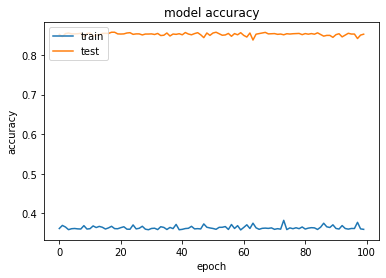

In [95]:
# summarize history for accuracy
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [96]:
y_pred = classifier.predict(X_test)


In [97]:
y_pred = (y_pred > 0.5)

In [98]:
# Making the Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)


[[1520   75]
 [ 202  203]]


In [100]:
# Calculate the Accuracy


In [101]:
from sklearn .metrics import accuracy_score

In [102]:
score = accuracy_score(y_pred, y_test)

In [104]:
print (score)

0.8615


In [109]:
##The accuracy is pretty good for 10k records and I'm sure if we will go with 1 million records then accuracy will be above
##90 percent.